# Study hit selections
Using filters taking from Matteo Bonanomi (StandaloneHGCALAnalysis)

In [1]:
import pandas as pd
import uproot
import os
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib widget

In [9]:
def loadDf(input_file, numEntries=1e3, filter_name=["event", 'rechit_detid',
       'rechit_module', 'rechit_layer', 'rechit_chip', 'rechit_channel',
       'rechit_x', 'rechit_y', 'rechit_z', 'rechit_energy']):
    df_hits = (
        ak.to_dataframe(
            uproot.open(input_file + ":rechitntupler/hits").arrays(library="ak", filter_name=filter_name, entry_stop=numEntries),
            levelname=lambda i : {0 : "event_minus_one", 1:"rechit_id"}[i]
        )
        .reset_index(level=1)
        .reset_index(level=0, drop=True)
        .set_index("event")
    )
    df_impact = (
        ak.to_dataframe(
            uproot.open(input_file + ":trackimpactntupler/impactPoints").arrays(library="ak", entry_stop=numEntries),
            levelname=lambda i: {0 : "event_minus_one"}[i]
        )
        .reset_index(drop=True)
        .set_index("event")
    )
    return pd.merge(df_hits, df_impact, on="event").set_index("rechit_id", append=True)
        

In [10]:
os.system("/opt/exp_soft/cms/t3/eos-login -username tcuisset")
#Data 100 GeV
df_full = loadDf('/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/ntuples/v16/ntuple_484.root')

# Simulation 100 GeV v3 (sim_proton)
#df_full = loadDf('/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/CMSSW11_0_withAHCAL_newBeamline/FTFP_BERT_EMN/v3/electrons/ntuple_sim_config22_pdgID11_beamMomentum100_listFTFP_BERT_EMN_0000_1.root')

# Simulation 100 GeV v5 (sim_noproton)
#df_full = loadDf('/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/CMSSW11_0_withAHCAL_newBeamline/FTFP_BERT_EMN/v5/electrons/ntuple_sim_config22_pdgID11_beamMomentum100_listFTFP_BERT_EMN_0000_1.root')

# Simulation 100 GeV v7 (with proton)
#df_full = loadDf('/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/CMSSW11_0_withAHCAL_newBeamline/FTFP_BERT_EMN/v7_33m/electrons/ntuple_sim_config22_pdgID11_beamMomentum100_listFTFP_BERT_EMN_0000_1.root')


In [11]:
df_full

rechit_detid  rechit_module  rechit_layer  rechit_chip  \
event rechit_id                                                           
1     0              16777341             78             1            2   
      1              16777405             78             1            1   
      2              16777406             78             1            1   
      3              16777469             78             1            1   
      4              33554491             90             2            2   
...                       ...            ...           ...          ...   
1000  722           620764934             55            37            3   
      723           620764997             55            37            3   
      724           620764998             55            37            0   
      725           620818682             71            37            0   
      726           637534459             62            38            3   

                 rechit_channel  rechit_x   rechit_y    rechit_z  \
event rechit_id                                                    
1     0                      32 -0.974487   2.812988   13.877500   
      1                      40 -1.948975   2.250488   13.877500   
      2                      38 -1.948975   1.125244   13.877500   
      3                      42 -2.923340   1.687744   13.877500   
      4                      60 -0.000009   5.625977   14.767500   
...                         ...       ...        ...         ...   
1000  722                    22  3.897949 -16.878906  129.968994   
      723                    28  2.923340 -16.316406  129.968994   
      724                    44  2.923340 -17.441406  129.968994   
      725                    44 -2.923340  17.441406  129.968994   
      726                    28 -2.923340   3.937988  137.796005   

                 rechit_energy  run  ...  impactY_HGCal_layer_39  \
event rechit_id                      ...                           
1     0               3.181789  484  ...             -999.000000   
      1               0.881229  484  ...             -999.000000   
      2               9.103610  484  ...             -999.000000   
      3               5.329899  484  ...             -999.000000   
      4               1.489653  484  ...             -999.000000   
...                        ...  ...  ...                     ...   
1000  722             1.057957  484  ...                0.469752   
      723             0.781373  484  ...                0.469752   
      724             0.903161  484  ...                0.469752   
      725             2.458575  484  ...                0.469752   
      726             1.192911  484  ...                0.469752   

                 impactX_HGCal_layer_40  impactY_HGCal_layer_40  trackChi2_X  \
event rechit_id                                                                
1     0                     -999.000000               -999.0000  -999.000000   
      1                     -999.000000               -999.0000  -999.000000   
      2                     -999.000000               -999.0000  -999.000000   
      3                     -999.000000               -999.0000  -999.000000   
      4                     -999.000000               -999.0000  -999.000000   
...                                 ...                     ...          ...   
1000  722                     -0.669715                  0.4723     1.265845   
      723                     -0.669715                  0.4723     1.265845   
      724                     -0.669715                  0.4723     1.265845   
      725                     -0.669715                  0.4723     1.265845   
      726                     -0.669715                  0.4723     1.265845   

                 trackChi2_Y  dwcReferenceType         m_x         m_y  \
event rechit_id                                                          
1     0          -999.000000                 0 -999.000000 -999.000000   
      1 

In [18]:
#Selections taken from Matteo Bonanomi : https://github.com/bonanomi/HGCALStandaloneAnalysis/blob/master/setup/reader.py
hit_sel = (
    (df_full.rechit_energy > 0.5) # Half-a-MIP cut
    # Kill faulty chips
    #& (df_full.ntracks == 1) & (df_full.dwcReferenceType == 13)
    & ~((df_full.rechit_chip == 3) & (df_full.rechit_channel == 22)) & ~((df_full.rechit_module == 78) & (df_full.rechit_chip == 0)) & (((df_full.rechit_layer != 37) & (df_full.rechit_layer != 36)))
)
hit_sel.value_counts()
df_step1 = df_full[hit_sel]

In [21]:
df_step2 = df_step1[(df_step1.ntracks == 1) & (df_step1.dwcReferenceType == 13)]
((df_step1.ntracks == 1) & (df_step1.dwcReferenceType == 13)).value_counts()

True     654570
False     32769
dtype: int64

<Axes: >

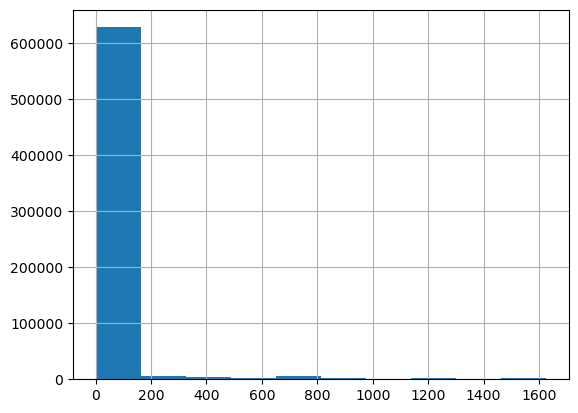

In [28]:
df_step2.trackChi2_X.hist()

<Axes: >

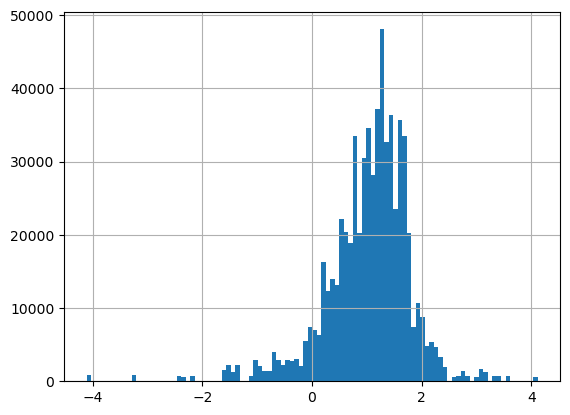

In [25]:
(df_step2.b_x+2.7).hist(bins=100)

<Axes: >

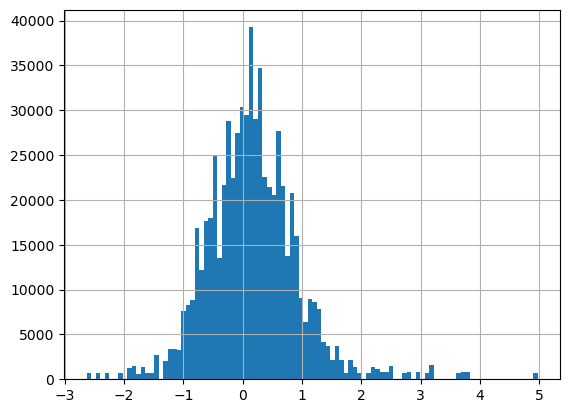

In [26]:
(df_step2.b_y-1.).hist(bins=100)

In [24]:
(abs(df_step2.b_x+2.7)<1.).value_counts()

False    399763
True     254807
Name: b_x, dtype: int64

<Axes: >

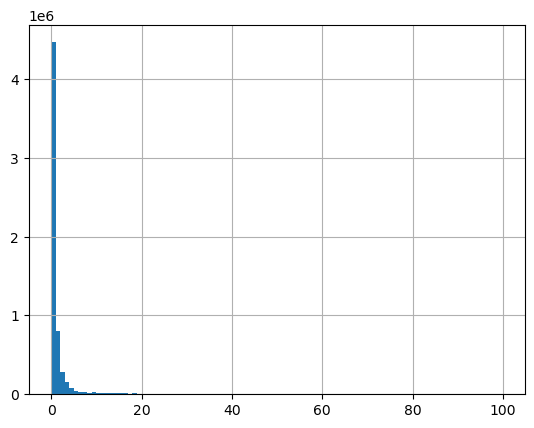

In [8]:
df_selected.trackChi2_X[df_selected.trackChi2_X < 100].hist(bins=100)